In [1]:
import os

#os.environ["NO_CACHE"] = "1"

In [2]:
from psession import parse, info

In [3]:
session_info = info('./data/20250827 Tiana ECoG-L.pssession')

In [4]:
session_info

[{'title': '20250827 Tiana ECoG-L N3 TOP',
  'date': datetime.datetime(2025, 8, 27, 16, 49, 15, 444776),
  'measurement_id': '250827164915',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N3 BOT',
  'date': datetime.datetime(2025, 8, 27, 16, 55, 50, 822776),
  'measurement_id': '250827165550',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 TOP',
  'date': datetime.datetime(2025, 8, 27, 17, 2, 15, 93624),
  'measurement_id': '250827170215',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N4 BOT',
  'date': datetime.datetime(2025, 8, 27, 17, 5, 55, 436680),
  'measurement_id': '250827170555',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 TOP',
  'date': datetime.datetime(2025, 8, 27, 17, 12, 27, 571624),
  'measurement_id': '250827171227',
  'method_id': 'eis'},
 {'title': '20250827 Tiana ECoG-L N5 BOT',
  'date': datetime.datetime(2025, 8, 27, 17, 16, 6, 568864),
  'measurement_id': '250827171606',
  'method_id': 'eis'},
 {'title': '20250827

In [5]:
import pandas as pd

damage = pd.read_csv("./data/parsed_electrodes.csv")

damage = damage.rename(
    columns=lambda c: (
        c[1:] if c.startswith("e") and c[1:].isdigit() else
        "32" if c == "eRef" else
        c
    )
)

damage["Device"] = damage["Device"].str.replace(
    r"^ECoG(\d+)$",
    lambda m: f"N{int(m.group(1)):02d}",
    regex=True,
)

print(damage.head())

  Device  1  2  3  4   5  6  7    8    9  ...  22  23  24  25  26  27  28  29  \
0    N01  0  0  0  0  80  0  0  100  100  ...   0   0   0   0   0   0   0   0   
1    N02  0  0  0  0   0  0  0    0    0  ...   0   0   0   0   0   0   0   0   
2    N03  0  0  0  0   0  0  0    0  100  ...   0   0   0   0   0   0   0   0   
3    N04  0  0  0  0   0  0  0    0    0  ...   0   0   0   0   0   0   0   0   
4    N05  0  0  0  0   0  0  0    0    0  ...   0   0   0   0  50   0   0   0   

   32                                    notes  
0   0                                      NaN  
1   0                                      NaN  
2   0                       full of air bubles  
3   0  air bubbles bewteen the two PDMS layers  
4   0                                      NaN  

[5 rows x 32 columns]


In [6]:
def parse_title(row):
    try:
        title = row.get("title")
        parts = title.split(" ")
        data, animal, implant, device_n, block = parts

        device_int = int(device_n[1:])
        two_digit_dev = f"N{device_int:02d}"

        return {
            "device": two_digit_dev,
            "block": block,
        }
    except Exception as e:
        print(f"Error annotating row {row}: {e}")
        return {}

def add_damage(row):
    damage_v = 0
    try:
        dev = row["device"]
        ch = row["channel"]
        damage_v = damage.loc[damage["Device"] == dev, str(ch)].iloc[0]
    except:
        damage_v = 0
        
    return {"damage": damage_v}
    
enrichments = [
    (
        lambda row: True, 
        parse_title
    ),
    (
        lambda row: row.get("block") == "BOT",
        lambda row: {"channel": row.get("channel", 0) + 16},
    ),
    (
        lambda row: True,
        add_damage,
    ),
    (
        lambda row: row["channel"] in [17, 24, 29], 
        lambda row: {"ch_type": "test"}
    ),
    (
        lambda row: pd.isna(row.get("ch_type")), 
        lambda row: {"ch_type": "ok"}
    ),
]

In [7]:
opts={"presort": ["device", "channel"]}

In [8]:
measurements = parse(
    './data/20250827 Tiana ECoG-L.pssession', 
    enrichments=enrichments,
    opts=opts
)

In [9]:
eis, cv, lsv = measurements.EIS, measurements.CV, measurements.LSV

In [10]:
eis[:10]

title                        date  measurement_id  \
0  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
1  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
2  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
3  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
4  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
5  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
6  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
7  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
8  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
9  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   

   channel method_id  min_freq  max_freq  n_freq          sweep_id  \
0        1       eis       1.0  100000.0       6  250828105028_ch1   
1        1       eis       1.0  100000.0       6  250828105028_ch1   
2        1       eis       1.0  100000.0       6  250828105028_ch1   
3        1       eis       1.0  100000.0       6  250828105028_ch1   
4        1       eis       1.0  100000.0       6  250828105028_ch1   
5        1       eis       1.0  100000.0       6  250828105028_ch1   
6        2       eis       1.0  100000.0       6  250828105028_ch2   
7        2       eis       1.0  100000.0       6  250828105028_ch2   
8        2       eis       1.0  100000.0       6  250828105028_ch2   
9        2       eis       1.0  100000.0       6  250828105028_ch2   

            idc  ...           zim             z      phase             c  \
0 -11920.928955  ...    319.792715   1073.828567  17.325881  4.976816e-09   
1   -691.413879  ...   1200.403246   2282.288147  31.733216  1.325846e-08   
2    -71.763992  ...   1267.275624   4146.806578  17.794432  1.255883e-07   
3     -6.597090  ...   2092.971674   5763.883143  21.291828  7.604257e-07   
4     -6.082058  ...   6722.751811  11236.854325  36.746598  2.367408e-06   
5     -0.558116  ...  24559.023436  33547.024249  47.060847  6.480508e-06   
6  16689.300537  ...   1426.109344   2715.575553  31.678958  1.116008e-09   
7     23.841858  ...   6237.228160   8926.004912  44.328437  2.551693e-09   
8    -11.205673  ...   6722.174415  18869.903399  20.869330  2.367611e-08   
9     -1.204014  ...  10709.878007  26948.909045  23.416624  1.486057e-07   

            cre           cim  device  block damage ch_type  
0  4.413862e-10  1.414877e-09     N01    TOP    0.0      ok  
1  3.667806e-09  5.930990e-09     N01    TOP    0.0      ok  
2  1.172907e-08  3.654398e-08     N01    TOP    0.0      ok  
3  1.002659e-07  2.572771e-07     N01    TOP    0.0      ok  
4  8.473790e-07  1.134919e-06     N01    TOP    0.0      ok  
5  3.473147e-06  3.231873e-06     N01    TOP    0.0      ok  
6  3.077862e-10  4.987580e-10     N01    TOP    0.0      ok  
7  1.245941e-09  1.275496e-09     N01    TOP    0.0      ok  
8  3.004627e-09  7.880996e-09     N01    TOP    0.0      ok  
9  2.347050e-08  5.419397e-08     N01    TOP    0.0      ok  

[10 rows x 22 columns]

In [11]:
eis[(eis["device"] == "N01") & (eis["channel"] == 5)]

title                        date  measurement_id  \
24  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
25  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
26  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
27  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
28  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
29  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   

    channel method_id  min_freq  max_freq  n_freq          sweep_id  \
24        5       eis       1.0  100000.0       6  250828105028_ch5   
25        5       eis       1.0  100000.0       6  250828105028_ch5   
26        5       eis       1.0  100000.0       6  250828105028_ch5   
27        5       eis       1.0  100000.0       6  250828105028_ch5   
28        5       eis       1.0  100000.0       6  250828105028_ch5   
29        5       eis       1.0  100000.0       6  250828105028_ch5   

             idc  ...           zim             z       phase             c  \
24  1.668930e+04  ...  3.494307e+04  3.593080e+04   76.534465  4.554693e-11   
25  1.668930e+02  ...  3.713401e+05  4.098124e+05   64.974861  4.285961e-11   
26  1.668930e+00  ...  2.291264e+06  2.772744e+06  124.274141  6.946163e-11   
27  1.668930e-02  ...  7.953883e+06  1.987992e+07   23.584197  2.000972e-10   
28  2.145767e-04  ...  2.150945e+08  2.161427e+08   95.644988  7.399304e-11   
29 -2.384186e-07  ...  3.007131e+09  3.040696e+09   81.478885  5.292585e-11   

             cre           cim  device  block damage ch_type  
24  4.307719e-11  1.031452e-11     N01    TOP   80.0      ok  
25  3.519021e-11  1.642827e-11     N01    TOP   80.0      ok  
26  4.743247e-11 -3.232488e-11     N01    TOP   80.0      ok  
27  3.203096e-11  7.337112e-11     N01    TOP   80.0      ok  
28  7.327712e-11 -7.242978e-12     N01    TOP   80.0      ok  
29  5.176384e-11  7.755661e-12     N01    TOP   80.0      ok  

[6 rows x 22 columns]

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.lines import Line2D
import numpy as np

figsize=(12, 7)

In [13]:
df = eis

In [14]:
df = df[df["ch_type"] == "ok"]

In [15]:
top_off = opts.get("blocks_offset", {}).get("TOP", 0)
df[(df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)]

title                        date  measurement_id  \
24  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
25  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
26  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
27  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
28  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   
29  20250827 Tiana ECoG-L N1 TOP  2025-08-28 10:50:28.100496    250828105028   

    channel method_id  min_freq  max_freq  n_freq          sweep_id  \
24        5       eis       1.0  100000.0       6  250828105028_ch5   
25        5       eis       1.0  100000.0       6  250828105028_ch5   
26        5       eis       1.0  100000.0       6  250828105028_ch5   
27        5       eis       1.0  100000.0       6  250828105028_ch5   
28        5       eis       1.0  100000.0       6  250828105028_ch5   
29        5       eis       1.0  100000.0       6  250828105028_ch5   

             idc  ...           zim             z       phase             c  \
24  1.668930e+04  ...  3.494307e+04  3.593080e+04   76.534465  4.554693e-11   
25  1.668930e+02  ...  3.713401e+05  4.098124e+05   64.974861  4.285961e-11   
26  1.668930e+00  ...  2.291264e+06  2.772744e+06  124.274141  6.946163e-11   
27  1.668930e-02  ...  7.953883e+06  1.987992e+07   23.584197  2.000972e-10   
28  2.145767e-04  ...  2.150945e+08  2.161427e+08   95.644988  7.399304e-11   
29 -2.384186e-07  ...  3.007131e+09  3.040696e+09   81.478885  5.292585e-11   

             cre           cim  device  block damage ch_type  
24  4.307719e-11  1.031452e-11     N01    TOP   80.0      ok  
25  3.519021e-11  1.642827e-11     N01    TOP   80.0      ok  
26  4.743247e-11 -3.232488e-11     N01    TOP   80.0      ok  
27  3.203096e-11  7.337112e-11     N01    TOP   80.0      ok  
28  7.327712e-11 -7.242978e-12     N01    TOP   80.0      ok  
29  5.176384e-11  7.755661e-12     N01    TOP   80.0      ok  

[6 rows x 22 columns]

In [16]:
mask = (df['title'] == '20250827 Tiana ECoG-L N1 TOP') & (df['channel'] == top_off + 5)
df_new = df[~mask]
df = df_new

In [17]:
unique_ids = np.unique(df['device'])
cmap = plt.get_cmap("tab20", len(unique_ids)) 
colors = {mid: cmap(i) for i, mid in enumerate(unique_ids)}

legend_handles = [
    Line2D([0], [0], color=col, label=grp)
    for grp, col in colors.items()
]

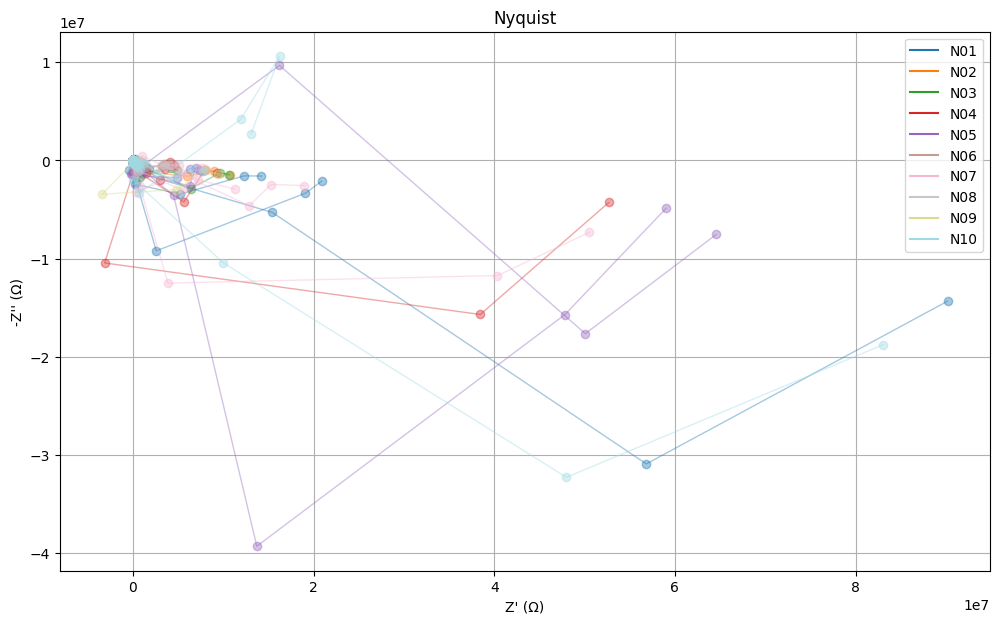

In [18]:
plt.figure(figsize=figsize)
seen = set()
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.plot(g["zre"], -g["zim"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    seen.add(mid)

plt.xlabel("Z' (Ω)")
plt.ylabel("-Z'' (Ω)")
plt.title("Nyquist")
plt.legend(handles=legend_handles)
plt.grid(True)

[devN01] channel order:       [8, 12, 23, 26]
[devN01] channel order (1Hz): [12, 8, 23, 26]


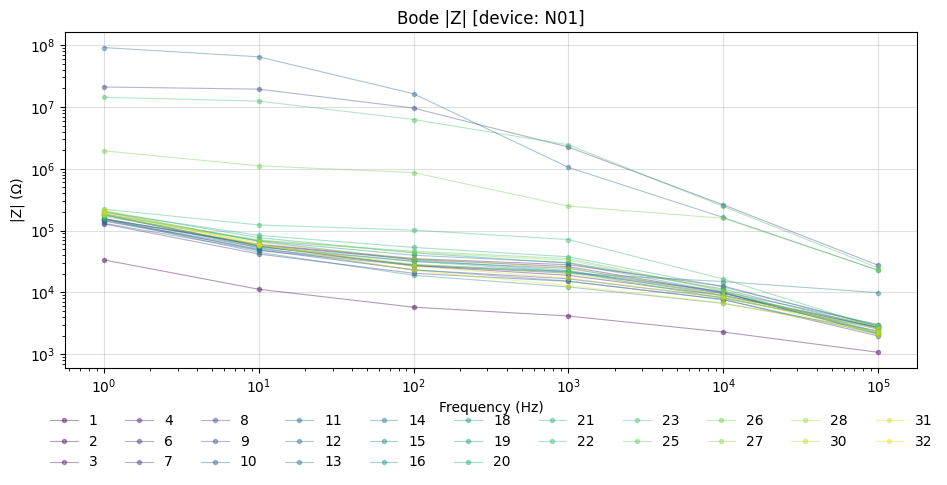

In [19]:
import pandas as pd

def median_rank_channels(df, frequency=None):
    if "z" not in df.columns:
        raise KeyError("column 'z' is required")

    if frequency is not None:
        sub = df[np.isclose(df["frequency"], frequency)]
        if sub.empty:
            raise ValueError(f"no rows with frequency={frequency}")
        ranks = sub.groupby("channel")["z"].median().sort_values().reset_index(name="score")
        order = ranks["channel"].tolist()
    else:
        cf = df.groupby(["channel","frequency"], as_index=False)["z"].median()
        cf["rank"] = cf.groupby("frequency")["z"].rank(method="average", ascending=True)
        ranks = (cf.groupby("channel")["rank"]
                   .median()
                   .sort_values()
                   .reset_index(name="score"))
        order = ranks["channel"].tolist()

    return order, ranks


def plot_device(data_df, device, figsize=figsize):
    df_nX = data_df[data_df['device'].isin([device])]
    
    order, ranks = median_rank_channels(df_nX)
    print(f"[dev{device}] channel order:      ", order[::-1][:4])
    order, ranks = median_rank_channels(df_nX, frequency=1.0)
    print(f"[dev{device}] channel order (1Hz):", order[::-1][:4])

    unique_ids_nX = np.unique(df_nX['channel'])
    cmap = plt.get_cmap("viridis")
    colors_nX = {mid: cmap(i / len(unique_ids_nX)) for i, mid in enumerate(unique_ids_nX)}

    plt.figure(figsize=figsize)
    for sid, g in df_nX.groupby(["device", "channel", "sweep_id"]):
        g = g.sort_values("frequency", ascending=False)
        mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
        plt.loglog(g["frequency"], mag, ".-", color=colors_nX[g["channel"].iloc[0]], linewidth=0.8, alpha=0.4, label=sid[1])

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("|Z| (Ω)")
    plt.title(f"Bode |Z| [device: {device}]")
    plt.grid(True, alpha=0.4)

    plt.legend(
        bbox_to_anchor=(0.5, -0.1),
        loc="upper center",
        ncol=11,
        frameon=False
    )
    plt.tight_layout()
    
plot_device(df, "N01", figsize=(10, 5))

[devN02] channel order:       [23, 9, 4, 7]
[devN02] channel order (1Hz): [23, 9, 4, 7]
[devN03] channel order:       [8, 22, 4, 26]
[devN03] channel order (1Hz): [8, 22, 4, 2]
[devN04] channel order:       [28, 4, 12, 20]
[devN04] channel order (1Hz): [28, 4, 12, 20]
[devN05] channel order:       [13, 12, 4, 5]
[devN05] channel order (1Hz): [12, 13, 4, 5]
[devN06] channel order:       [20, 27, 2, 18]
[devN06] channel order (1Hz): [20, 2, 27, 18]
[devN07] channel order:       [1, 8, 9, 22]
[devN07] channel order (1Hz): [1, 8, 9, 22]
[devN08] channel order:       [3, 5, 32, 15]
[devN08] channel order (1Hz): [3, 5, 32, 14]
[devN09] channel order:       [23, 12, 16, 2]
[devN09] channel order (1Hz): [23, 2, 16, 12]
[devN10] channel order:       [14, 12, 5, 26]
[devN10] channel order (1Hz): [14, 12, 5, 26]


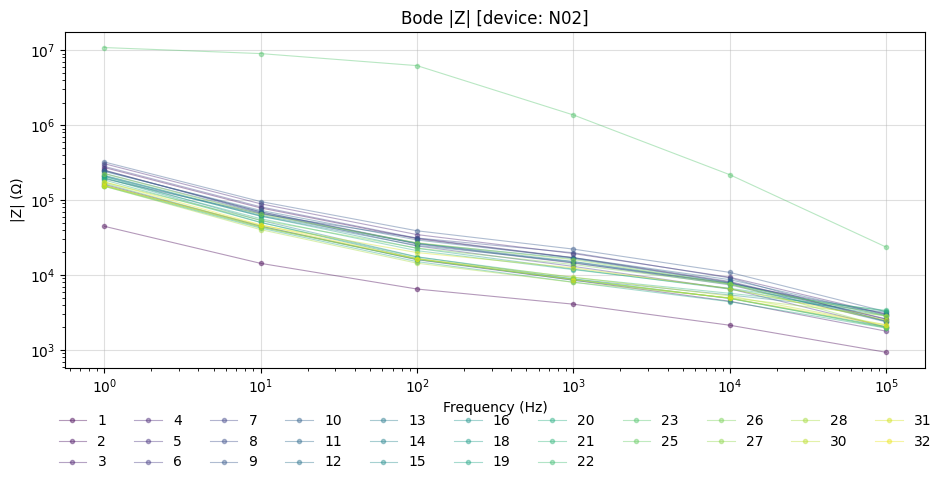

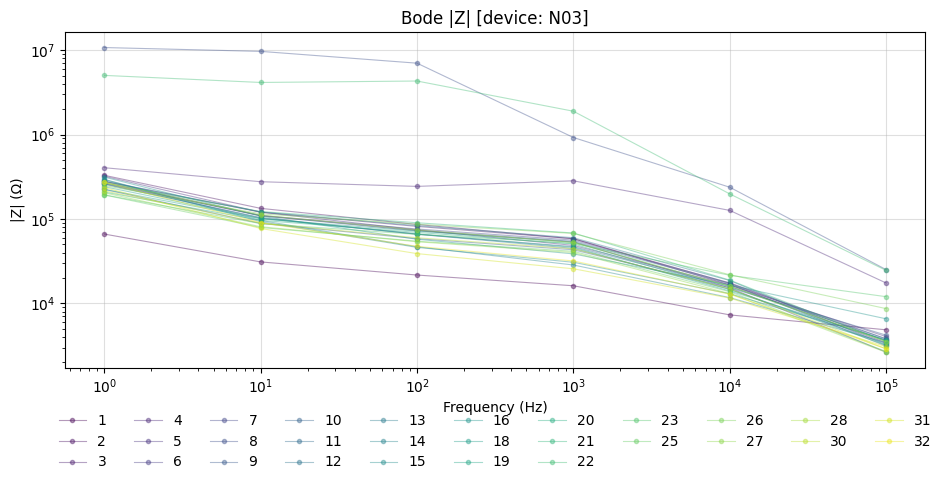

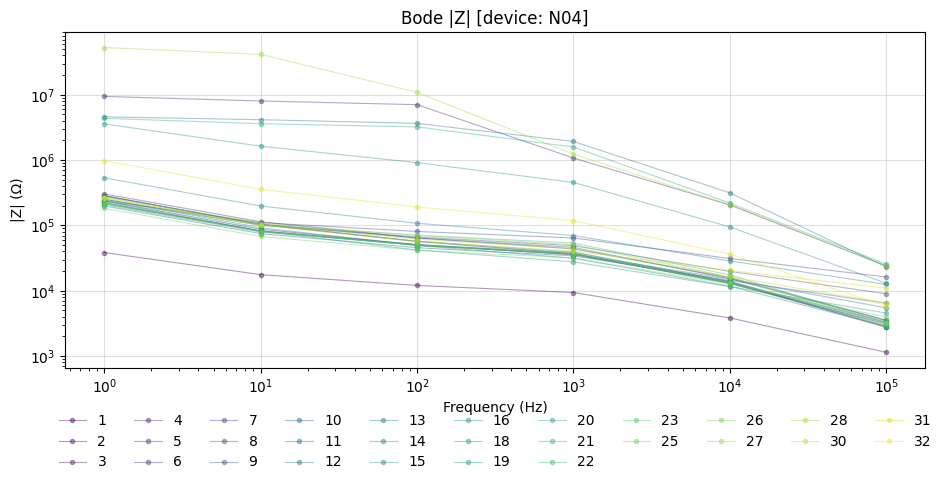

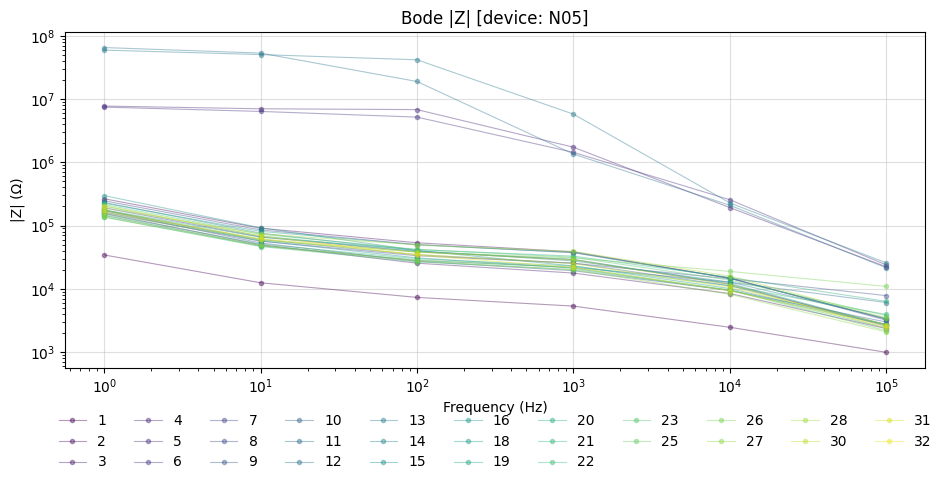

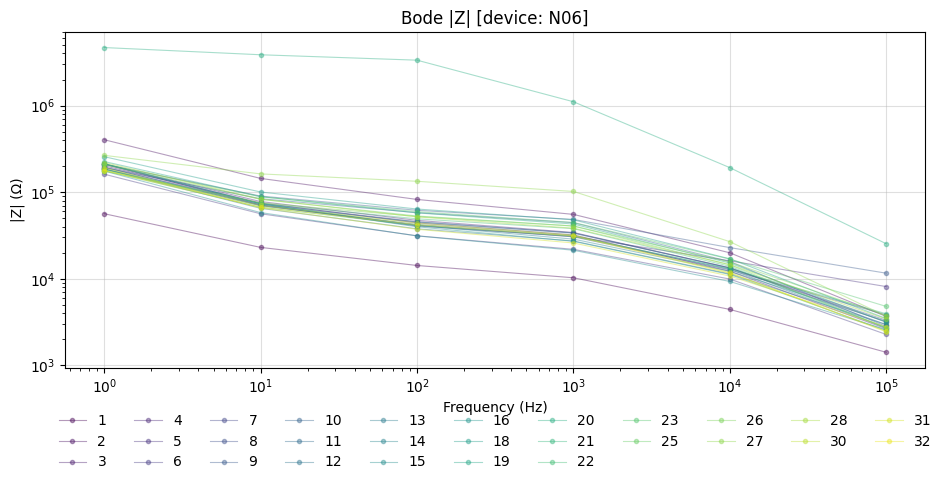

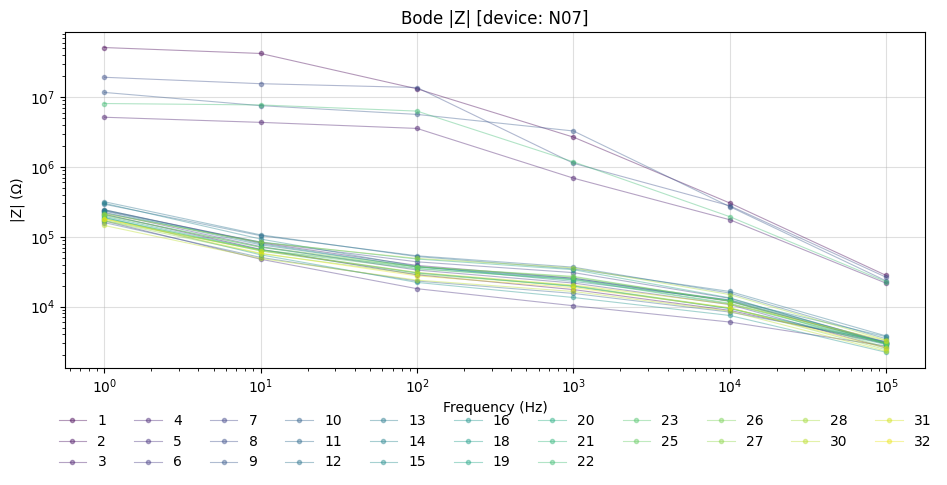

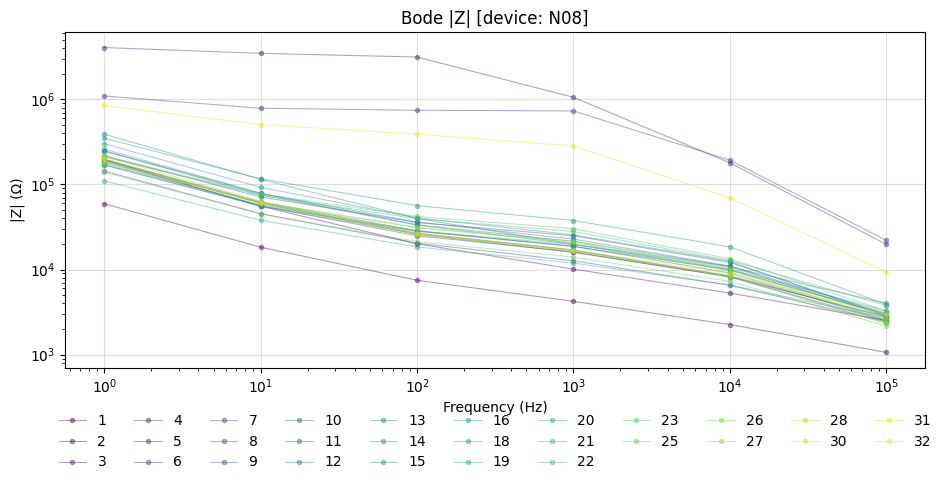

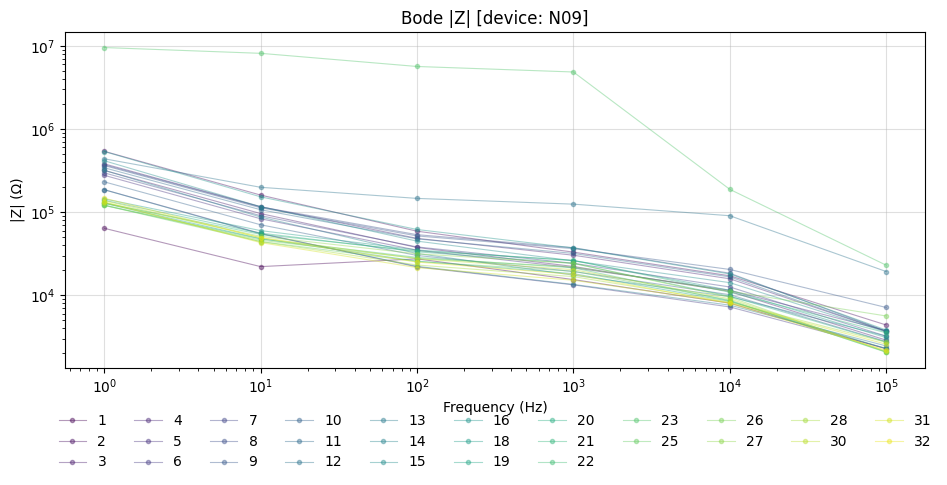

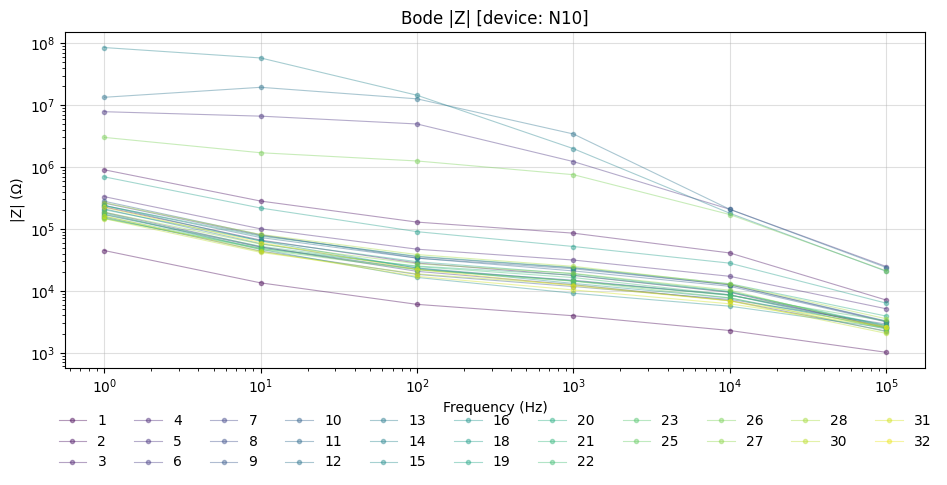

In [20]:
plot_device(df, "N02", figsize=(10, 5))
plot_device(df, "N03", figsize=(10, 5))
plot_device(df, "N04", figsize=(10, 5))
plot_device(df, "N05", figsize=(10, 5))
plot_device(df, "N06", figsize=(10, 5))
plot_device(df, "N07", figsize=(10, 5))
plot_device(df, "N08", figsize=(10, 5))
plot_device(df, "N09", figsize=(10, 5))
plot_device(df, "N10", figsize=(10, 5))

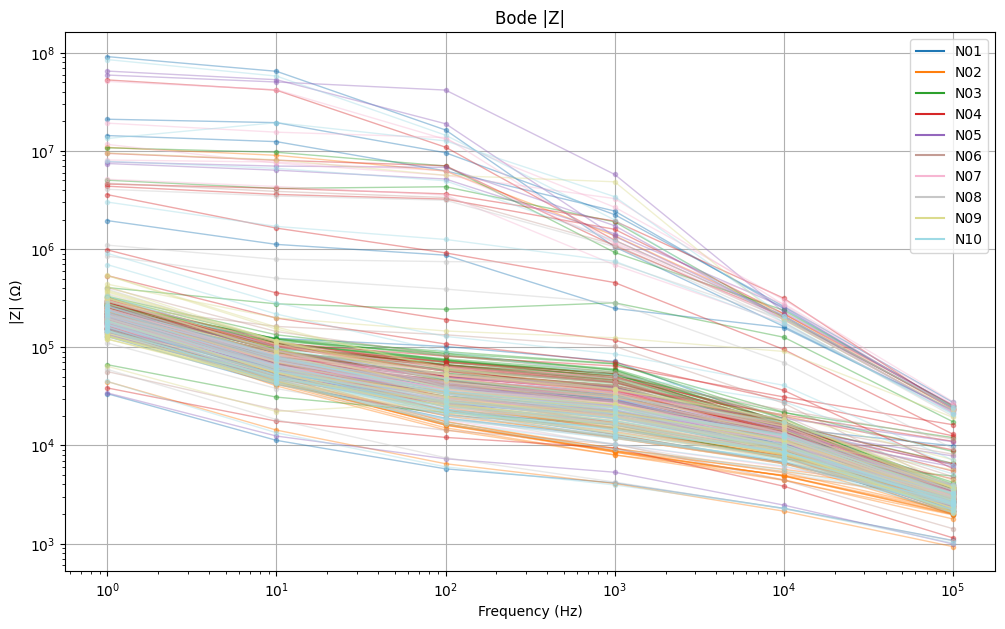

In [21]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    mag = g["z"].to_numpy() if "z" in g.columns else np.hypot(g["zre"], g["zim"])
    mid = g["device"].iloc[0]
    plt.loglog(g["frequency"], mag, ".-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω)")
plt.title("Bode |Z|")
plt.legend(handles=legend_handles)
plt.grid(True)

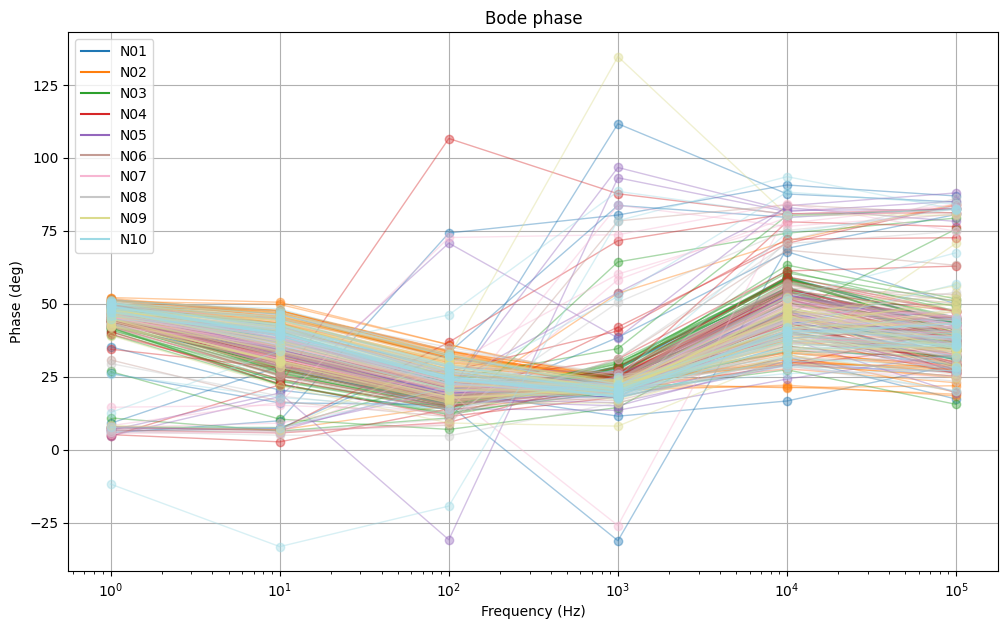

In [22]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["device", "channel", "sweep_id"]):
    g = g.sort_values("frequency", ascending=False)
    phase = g["phase"].to_numpy() if "phase" in g.columns else np.degrees(np.arctan2(g["zim"], g["zre"]))
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], phase, "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.title("Bode phase")
plt.grid(True)
plt.legend(handles=legend_handles)
plt.show()

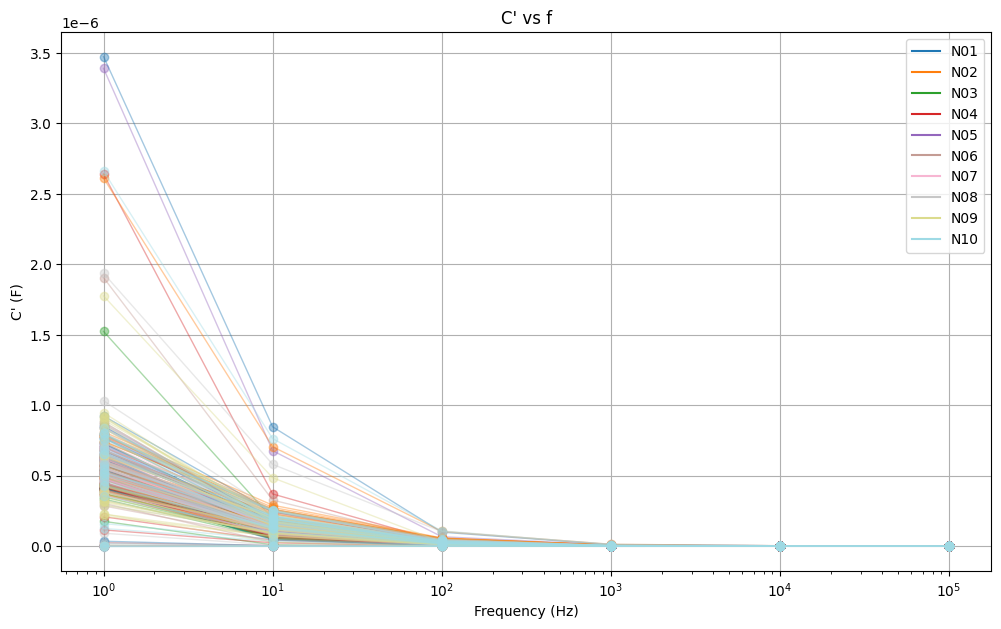

In [23]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], g["cre"], "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C' (F)"); plt.title("C' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

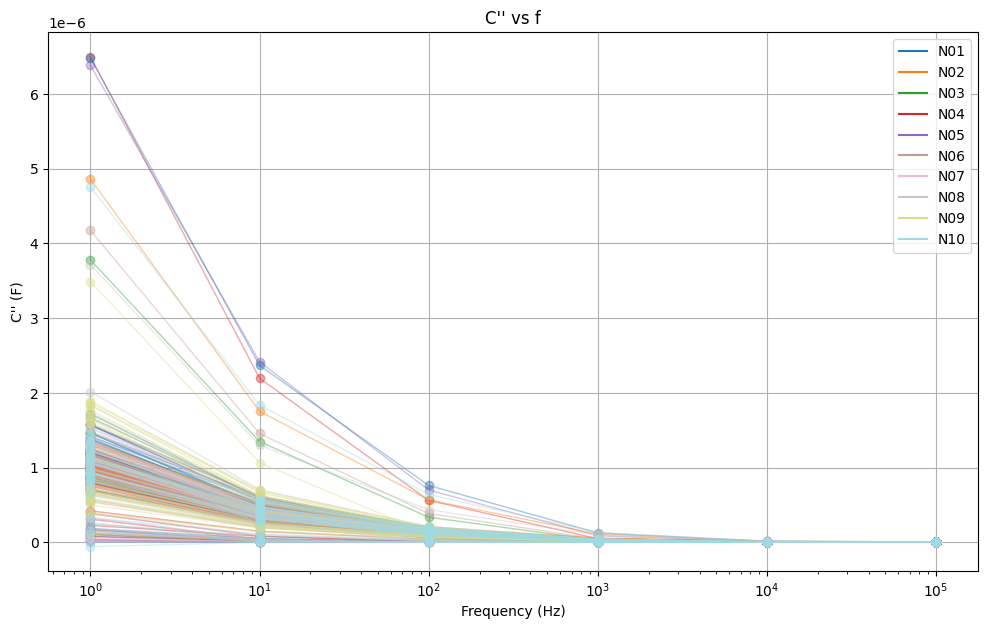

In [24]:
plt.figure(figsize=figsize)
for sid, g in df.groupby(["sweep_id", "channel"]):
    g = g.sort_values("frequency", ascending=False)
    c_plot = g["c"]          # or: -g["c"]
    mid = g["device"].iloc[0]
    plt.semilogx(g["frequency"], c_plot, "o-", color=colors[mid], linewidth=1, alpha=0.4)
    
plt.xlabel("Frequency (Hz)")
plt.ylabel("C'' (F)"); plt.title("C'' vs f")
plt.legend(handles=legend_handles)
plt.grid(True)

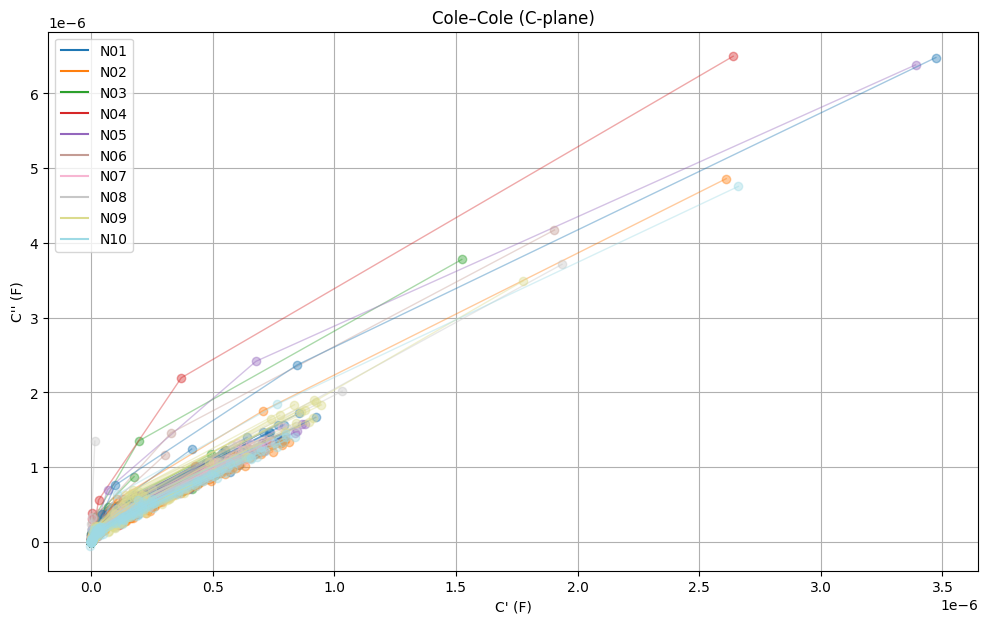

In [25]:
plt.figure(figsize=figsize)

for sid, g in df.groupby(["sweep_id", "channel"]):
    mid = g["device"].iloc[0]
    plt.plot(g["cre"], g["c"], "o-", color=colors[mid], linewidth=1, alpha=0.4)

plt.xlabel("C' (F)")
plt.ylabel("C'' (F)")
plt.title("Cole–Cole (C-plane)")
plt.legend(handles=legend_handles)
plt.grid(True)

In [26]:
base = df.groupby(["device","channel","frequency"], as_index=False)["z"].mean()

summary = (base.groupby(["channel","frequency"])["z"]
               .agg(["mean","std","var","min","max"])
               .reset_index())

In [27]:
v = (base
     .groupby(["channel","frequency"])["z"]
     .var(ddof=1)               # variance across devices
     .reset_index(name="var_z"))


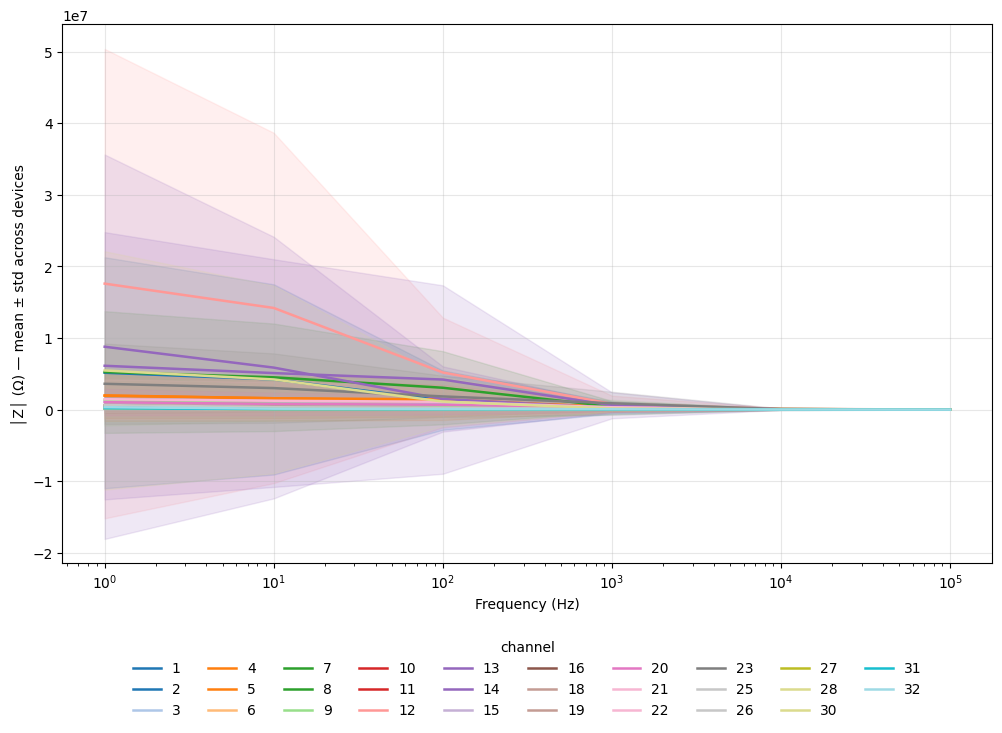

In [28]:
channels = summary["channel"].unique()
cmap = plt.get_cmap("tab20")
colors = {c: cmap(i/len(channels)) for i,c in enumerate(channels)}

plt.figure(figsize=figsize)
for c in channels:
    s = summary[summary["channel"]==c].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[c], label=str(c))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.15, color=colors[c])

    plt.xlabel("Frequency (Hz)")
plt.ylabel("│Z│ (Ω) — mean ± std across devices")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)


In [29]:
summary_dev = (base[base['device'].isin(['N06', 'N08', 'N09'])]
               .groupby(["device","frequency"])["z"]
               .agg(mean="mean", std="std", n="count")
               .reset_index())

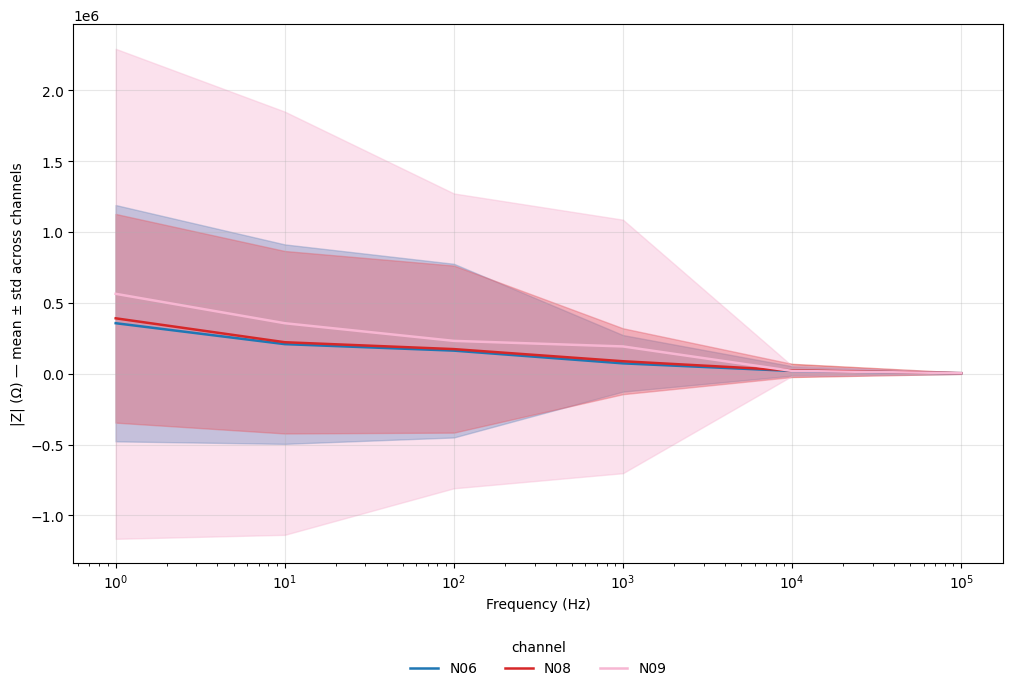

In [30]:
devices = summary_dev["device"].unique()
cmap = plt.get_cmap("tab20")
colors = {d: cmap(i/len(devices)) for i,d in enumerate(devices)}

plt.figure(figsize=figsize)
for d in devices:
    s = summary_dev[summary_dev["device"]==d].sort_values("frequency")
    f = s["frequency"].to_numpy()
    m = s["mean"].to_numpy()
    sdev = s["std"].to_numpy()
    plt.semilogx(f, m, lw=1.8, color=colors[d], label=str(d))
    plt.fill_between(f, m - sdev, m + sdev, alpha=0.4, color=colors[d])
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Z| (Ω) — mean ± std across channels")
plt.grid(True, alpha=0.3)

plt.legend(title="channel", bbox_to_anchor=(0.5,-0.12), loc="upper center",
           ncol=min(10, len(channels)), frameon=False)

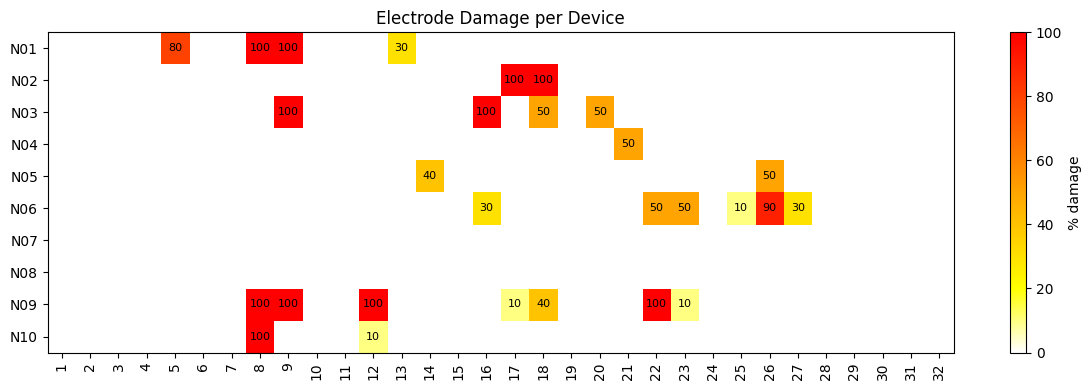

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

eis = eis.copy()
eis["channel"] = eis["channel"].astype(int)
eis["damage"] = pd.to_numeric(eis["damage"], errors="coerce")

# if duplicates exist, aggregate them
mat = eis.pivot_table(
    index="device",
    columns="channel",
    values="damage",
    aggfunc="first",      # or "max"/"mean" — your call
    fill_value=0,
)

# plot (same as before)
cmap = LinearSegmentedColormap.from_list("wyorr", [
    (0.0, "white"), (0.2, "yellow"), (0.5, "orange"), (1.0, "red")
])

fig, ax = plt.subplots(figsize=(12, 4))
im = ax.imshow(mat.to_numpy(), aspect="auto", cmap=cmap, vmin=0, vmax=100, interpolation="nearest")
ax.set_yticks(range(mat.shape[0])); ax.set_yticklabels(mat.index)
ax.set_xticks(range(mat.shape[1])); ax.set_xticklabels(mat.columns.astype(str), rotation=90)

a = mat.to_numpy()
for i, j in np.argwhere(a > 0):
    ax.text(j, i, int(a[i, j]), ha="center", va="center", fontsize=8, color="black")

fig.colorbar(im, ax=ax).set_label("% damage")
ax.set_title("Electrode Damage per Device")
plt.tight_layout(); plt.show()

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_eis_heatmap_across(
    df, *,
    freq_col="freq",
    val_col="impedance",
    device_col="device",
    channel_col="channel",
    damage_col="damage",
    n_freq=200,
    sort_desc=True,
):
    d = df.copy()
    d[channel_col] = d[channel_col].astype(int)
    d[damage_col]  = pd.to_numeric(d[damage_col], errors="coerce")
    d = d.dropna(subset=[freq_col, val_col])

    # sort (device,channel) by damage (use max per pair)
    pairs = (d.groupby([device_col, channel_col], as_index=False)[damage_col]
               .max()
               .sort_values(damage_col, ascending=not sort_desc))

    if pairs.empty:
        raise ValueError("No (device, channel) pairs to plot.")

    fmin, fmax = d[freq_col].min(), d[freq_col].max()
    fgrid = np.logspace(np.log10(fmin), np.log10(fmax), n_freq)

    rows, labels = [], []
    for dev, ch, dmg in pairs[[device_col, channel_col, damage_col]].itertuples(index=False):
        g = d[(d[device_col] == dev) & (d[channel_col] == ch)].sort_values(freq_col)
        x = g[freq_col].to_numpy()
        y = g[val_col].to_numpy()
        if x.size < 2: 
            continue

        # Bode magnitude (dB)
        y_db = np.where(y > 0, 20*np.log10(y), np.nan)

        z = np.full_like(fgrid, np.nan, dtype=float)
        m = (fgrid >= x.min()) & (fgrid <= x.max())
        if m.any():
            z[m] = np.interp(np.log10(fgrid[m]), np.log10(x), y_db)
            rows.append(z)
            label = f"{dev}:{ch}" + (f" ({int(dmg)}%)" if pd.notna(dmg) else "")
            labels.append(label)

    if not rows:
        raise ValueError("No spectra after interpolation.")

    M = np.vstack(rows)
    vmin, vmax = np.nanpercentile(M, [5, 95])

    fig_h = max(3, 0.03 * len(labels))
    fig, ax = plt.subplots(figsize=(12, fig_h))
    extent = [np.log10(fgrid[0]), np.log10(fgrid[-1]), -0.5, len(labels) - 0.5]
    im = ax.imshow(M, aspect="auto", origin="upper", extent=extent,
                   cmap="viridis", vmin=vmin, vmax=vmax)

    kmin, kmax = int(np.floor(np.log10(fmin))), int(np.ceil(np.log10(fmax)))
    xticks = [10**k for k in range(kmin, kmax + 1)]
    ax.set_xticks(np.log10(xticks))
    ax.set_xticklabels([f"{v:g}" for v in xticks])
    ax.set_xlabel("Frequency (Hz, log)")
    # ax.set_yticks(range(len(labels)))
    # ax.set_yticklabels(labels)
    ax.set_ylabel("device:channel (damage)")
    fig.colorbar(im, ax=ax).set_label("20·log10(|Z|) [dBΩ]")
    ax.set_title("EIS spectra heatmap — sorted by damage")
    plt.tight_layout(); plt.show()


def plot_bode_by_damage_bins(
    df, *,
    freq_col="freq",
    val_col="impedance",
    damage_col="damage",
    bins=(0, 1, 20, 50, 101),
    labels=("0", "1–19", "20–49", "50+"),
    n_freq=200,
):
    d = df.copy()
    d[damage_col] = pd.to_numeric(d[damage_col], errors="coerce")
    d = d.dropna(subset=[freq_col, val_col, damage_col])
    d["bin"] = pd.cut(d[damage_col], bins=bins, labels=labels, include_lowest=True, right=False)
    d = d.dropna(subset=["bin"])

    fmin, fmax = d[freq_col].min(), d[freq_col].max()
    fgrid = np.logspace(np.log10(fmin), np.log10(fmax), n_freq)

    plt.figure(figsize=(8, 5))
    for b in d["bin"].cat.categories:
        g = d[d["bin"] == b]
        if g.empty:
            continue
        agg = g.groupby(freq_col, as_index=True)[val_col].median().sort_index()
        x = agg.index.to_numpy()
        y = agg.to_numpy()
        y_db = np.where(y > 0, 20*np.log10(y), np.nan)
        y_interp = np.interp(np.log10(fgrid), np.log10(x), y_db, left=np.nan, right=np.nan)
        plt.plot(fgrid, y_interp, label=f"{b}%")

    plt.xscale("log")
    plt.xlabel("Frequency (Hz, log)")
    plt.ylabel("20·log10(|Z|) [dBΩ]")
    plt.title("Median Bode vs damage bin")
    plt.legend(title="damage")
    plt.tight_layout(); plt.show()

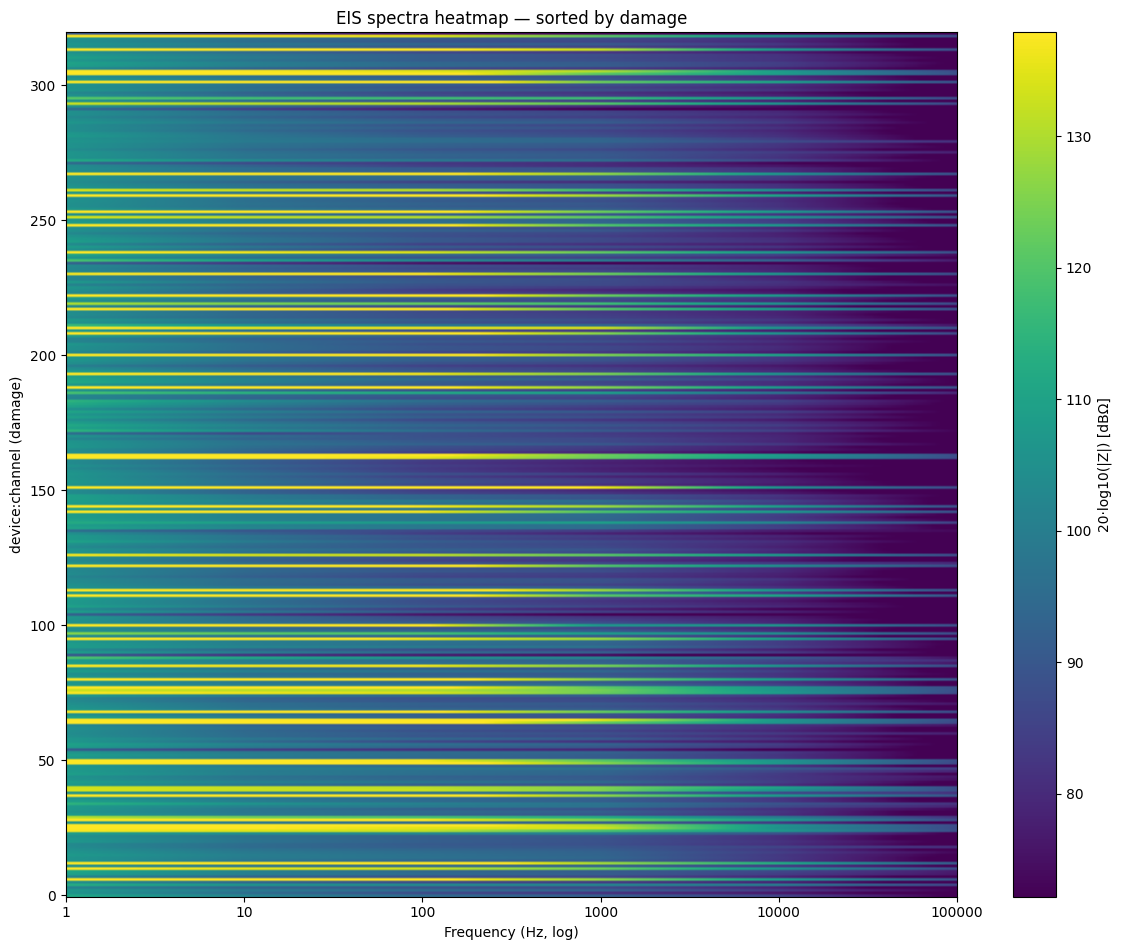

In [33]:
plot_eis_heatmap_across(eis, freq_col="frequency", val_col="z", sort_desc=False)

In [34]:
mask = np.isclose(eis["damage"], 10)
eis_no10_damage = eis#[~mask]

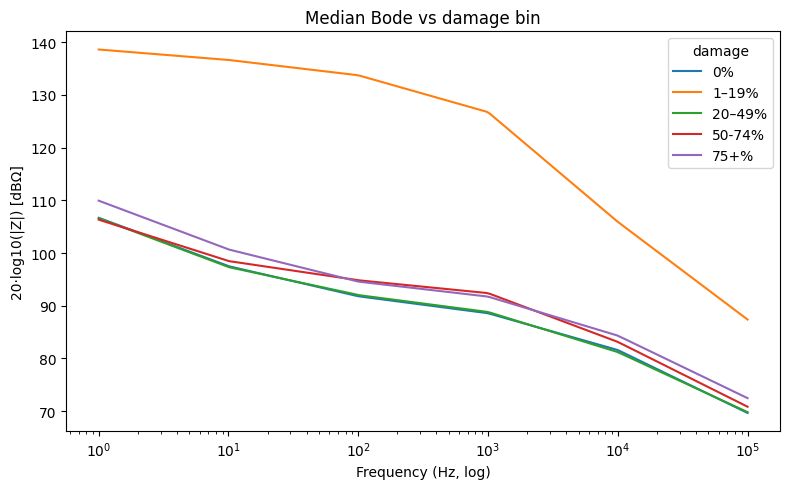

In [35]:
plot_bode_by_damage_bins(
    eis_no10_damage, 
    freq_col="frequency", 
    val_col="z", 
    bins=(0, 1, 20, 50, 75, 101),
    labels=("0", "1–19", "20–49", "50-74", "75+"),
)

[devN09] channel order:       [24, 29, 23, 17]
[devN09] channel order (1Hz): [24, 23, 17, 29]
[devN10] channel order:       [29, 14, 24, 12]
[devN10] channel order (1Hz): [14, 29, 24, 12]


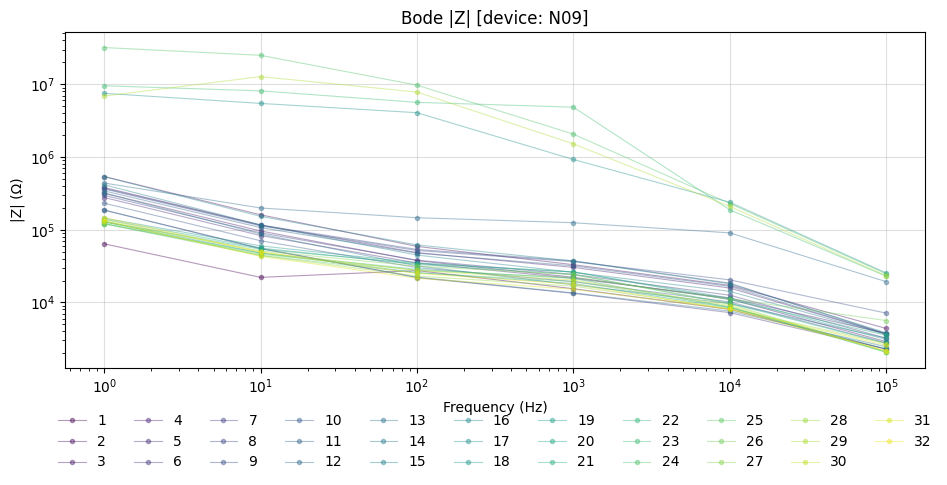

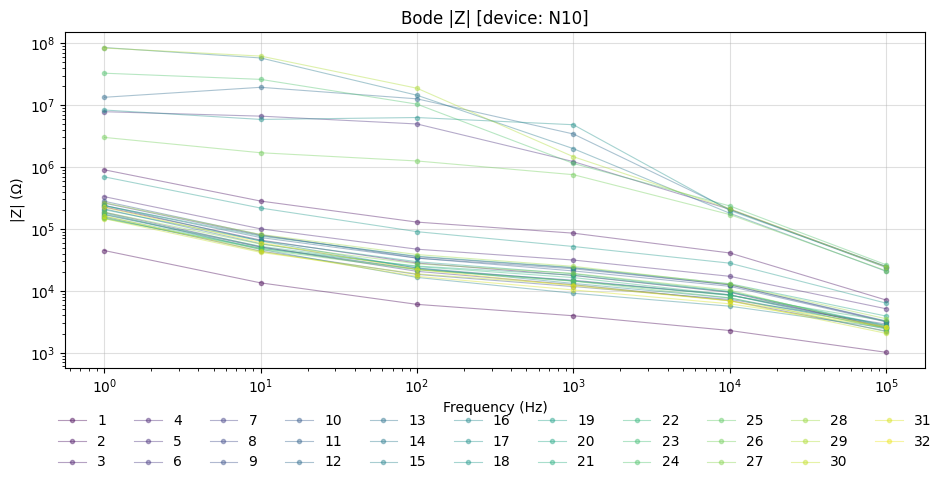

In [36]:
plot_device(eis, "N09", figsize=(10, 5))
plot_device(eis, "N10", figsize=(10, 5))

In [37]:
measurements_data = parse('./data/data.pssession', force_reload=True)

Parsed 2 EIS measurements
Parsed 2 LSV measurements
Parsed 2 CV measurements


In [38]:
measurements_data.EIS

title                       date measurement_id  \
0       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
1       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
2       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
3       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
4       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
5       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
6       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
7       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
8       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
9       Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
10      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
11      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
12      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
13      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
14      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
15      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
16      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
17      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
18      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
19      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
20      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
21      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
22      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
23      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
24      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
25      Impedance Spectroscopy 2025-08-27 16:36:06.279240   250827163606   
26  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
27  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
28  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
29  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
30  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
31  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
32  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
33  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
34  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
35  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
36  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
37  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
38  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
39  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
40  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
41  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
42  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
43  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
44  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
45  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
46  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
47  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
48  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
49  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
50  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004   
51  Impedance Spectroscopy [1] 2025-08-27 16:40:04.830400   250827164004 

In [39]:
session_info = info('./data/20250821 - L3 activation.pssession')

In [40]:
session_info

[{'title': '20250821 - L3 TOP',
  'date': datetime.datetime(2025, 8, 21, 17, 24, 15, 177608),
  'measurement_id': '250821172415',
  'method_id': 'eis'},
 {'title': '20250821 - L3 TOP ch01-06 -1.2_1.2 50mV/s WIDE WW',
  'date': datetime.datetime(2025, 8, 21, 17, 35, 36, 624192),
  'measurement_id': '250821173536',
  'e_vtx1': 1.2000001,
  'e_vtx2': -1.2000001,
  'scan_rate': 0.050000001,
  'n_scans': 60,
  'method_id': 'cv'},
 {'title': '20250822 - L3 TOP post slow CV',
  'date': datetime.datetime(2025, 8, 22, 9, 10, 49, 912496),
  'measurement_id': '250822091049',
  'method_id': 'eis'},
 {'title': '20250822 - L3 TOP ch07-10 -0.9_1.2 1V/s medium WW',
  'date': datetime.datetime(2025, 8, 22, 9, 23, 6, 399352),
  'measurement_id': '250822092306',
  'e_vtx1': 1.2000001,
  'e_vtx2': -0.89999998,
  'scan_rate': 1.0,
  'n_scans': 60,
  'method_id': 'cv'},
 {'title': '20250822 - L3 TOP post fast CV',
  'date': datetime.datetime(2025, 8, 22, 10, 46, 2, 128536),
  'measurement_id': '250822104602

In [41]:
info('./data/data.pssession')

[{'title': 'Impedance Spectroscopy',
  'date': datetime.datetime(2025, 8, 27, 16, 36, 6, 279240),
  'measurement_id': '250827163606',
  'method_id': 'eis'},
 {'title': 'Cyclic Voltammetry',
  'date': datetime.datetime(2025, 8, 27, 16, 38, 1, 877760),
  'measurement_id': '250827163801',
  'e_vtx1': 1.0,
  'e_vtx2': -1.0,
  'scan_rate': 2.0,
  'n_scans': 5,
  'method_id': 'cv'},
 {'title': 'Linear Sweep Voltammetry',
  'date': datetime.datetime(2025, 8, 27, 16, 38, 54, 551272),
  'measurement_id': '250827163854',
  'e_begin': 0.0,
  'e_end': 2.0,
  'method_id': 'lsv'},
 {'title': 'Linear Sweep Voltammetry [1]',
  'date': datetime.datetime(2025, 8, 27, 16, 39, 7, 565200),
  'measurement_id': '250827163907',
  'e_begin': 0.0,
  'e_end': -2.0,
  'method_id': 'lsv'},
 {'title': 'Cyclic Voltammetry [1]',
  'date': datetime.datetime(2025, 8, 27, 16, 39, 35, 732912),
  'measurement_id': '250827163935',
  'e_vtx1': 1.0,
  'e_vtx2': -1.0,
  'scan_rate': 2.0,
  'n_scans': 5,
  'method_id': 'cv'},


In [42]:
data = parse('./data/data.pssession', force_reload=True)

Parsed 2 EIS measurements
Parsed 2 LSV measurements
Parsed 2 CV measurements


In [43]:
cv250827163801 = data.CV[data.CV["measurement_id"] == '250827163801']

In [44]:
cv250827163801

title                       date measurement_id  cycle  \
0     Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
1     Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
2     Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
3     Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
4     Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
...                  ...                        ...            ...    ...   
1995  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
1996  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
1997  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
1998  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
1999  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   

      channel method_id  e_begin  e_end  e_step  e_vtx1  e_vtx2  scan_rate  \
0           1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1           1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
2           1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
3           1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
4           1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
...       ...       ...      ...    ...     ...     ...     ...        ...   
1995        2        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1996        2        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1997        2        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1998        2        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1999        2        cv      0.0    0.5    0.02     1.0    -1.0        2.0   

      n_scans          sweep_id  sweep_dir   voltage   current    charge  \
0           5  250827163801_ch1          1  0.000039 -2.844334 -0.000000   
1           5  250827163801_ch1          1  0.020040 -2.396107 -0.026203   
2           5  250827163801_ch1          1  0.040039 -1.990795 -0.048137   
3           5  250827163801_ch1          1  0.060040 -1.637936 -0.066281   
4           5  250827163801_ch1          1  0.079961 -1.299381 -0.080910   
...       ...               ...        ...       ...       ...       ...   
1995        5  250827163801_ch2          1 -0.099883 -0.023239 -0.060299   
1996        5  250827163801_ch2          1 -0.079883 -0.018737 -0.060509   
1997        5  250827163801_ch2          1 -0.059961 -0.014184 -0.060673   
1998        5  250827163801_ch2          1 -0.039961 -0.009697 -0.060792   
1999        5  250827163801_ch2          1 -0.019961 -0.005233 -0.060867   

      charge_segment    q_norm  
0           0.000000  0.019470  
1          -0.026203  0.014760  
2          -0.048137  0.010817  
3          -0.066281  0.007556  
4          -0.080910  0.004927  
...              ...       ...  
1995       -0.009935  0.009297  
1996       -0.010145  0.005861  
1997       -0.010309  0.003177  
1998       -0.010428  0.001222  
1999       -0.010503  0.000000  

[2000 rows x 20 columns]

In [45]:
df = cv250827163801[cv250827163801["channel"] == 1].copy()
df

title                       date measurement_id  cycle  \
0    Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
1    Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
2    Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
3    Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
4    Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      1   
..                  ...                        ...            ...    ...   
995  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
996  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
997  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
998  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   
999  Cyclic Voltammetry 2025-08-27 16:38:01.877760   250827163801      5   

     channel method_id  e_begin  e_end  e_step  e_vtx1  e_vtx2  scan_rate  \
0          1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
1          1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
2          1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
3          1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
4          1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
..       ...       ...      ...    ...     ...     ...     ...        ...   
995        1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
996        1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
997        1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
998        1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   
999        1        cv      0.0    0.5    0.02     1.0    -1.0        2.0   

     n_scans          sweep_id  sweep_dir   voltage   current    charge  \
0          5  250827163801_ch1          1  0.000039 -2.844334 -0.000000   
1          5  250827163801_ch1          1  0.020040 -2.396107 -0.026203   
2          5  250827163801_ch1          1  0.040039 -1.990795 -0.048137   
3          5  250827163801_ch1          1  0.060040 -1.637936 -0.066281   
4          5  250827163801_ch1          1  0.079961 -1.299381 -0.080910   
..       ...               ...        ...       ...       ...       ...   
995        5  250827163801_ch1          1 -0.099883 -0.452757 -3.981849   
996        5  250827163801_ch1          1 -0.079883  0.126600 -3.983480   
997        5  250827163801_ch1          1 -0.059961  0.357605 -3.981069   
998        5  250827163801_ch1          1 -0.039961  1.450711 -3.972027   
999        5  250827163801_ch1          1 -0.019961  2.539716 -3.952075   

     charge_segment    q_norm  
0          0.000000  0.019470  
1         -0.026203  0.014760  
2         -0.048137  0.010817  
3         -0.066281  0.007556  
4         -0.080910  0.004927  
..              ...       ...  
995        6.490791  0.550553  
996        6.489160  0.550414  
997        6.491572  0.550619  
998        6.500613  0.551386  
999        6.520565  0.553078  

[1000 rows x 20 columns]

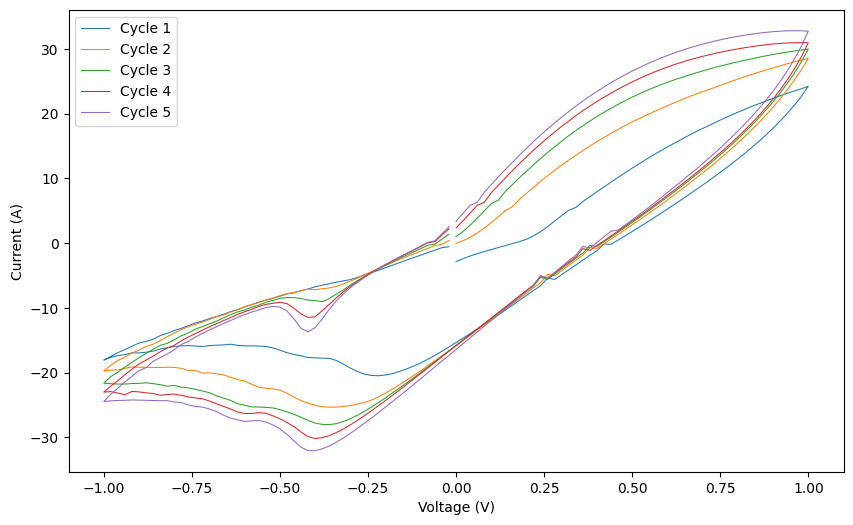

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

for cycle, group in df.groupby("cycle"):
    ax.plot(group["voltage"], group["current"], label=f"Cycle {cycle}", linewidth=0.75)

ax.set_xlabel("Voltage (V)")
ax.set_ylabel("Current (A)")
ax.legend()
plt.show()

In [47]:
df = cv250827163801[cv250827163801["channel"] == 1].copy()

scan_rate = np.unique(df["scan_rate"])[0]
scan_rate

np.float64(2.0)

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_df = cv250827163801[cv250827163801["channel"] == 1]
df = base_df.copy()
scan_rate = scan_rate

# --- 2) compute charge column first (per cycle, cumulative) ---
def add_charge(df, nu):
    # keep existing acquisition order within each cycle
    def _one_cycle(g):
        E = g["voltage"].to_numpy()
        I = g["current"].to_numpy()
        # trapezoid on E, then divide by scan rate to convert dE to dt
        dE   = np.diff(E)
        Imid = 0.5 * (I[1:] + I[:-1])
        dQ   = (Imid * dE) / nu
        Q    = np.concatenate([[0.0], np.cumsum(dQ)])
        g = g.copy()
        g["charge_C"] = Q
        return g
    return df.groupby("cycle", group_keys=False).apply(_one_cycle)

df = add_charge(df, scan_rate)   # <- NEW COLUMN df["charge_C"]

/var/folders/mz/9k6g1w9n659_kwr57qw2wdl00000gn/T/ipykernel_11765/2744780687.py:23: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby("cycle", group_keys=False).apply(_one_cycle)


In [49]:
# per-cycle net, anodic, and cathodic charge (from the incremental dQ)
def per_cycle_Q(df, nu):
    out = []
    for cyc, g in df.groupby("cycle", sort=True):
        E = g["voltage"].to_numpy()
        I = g["current"].to_numpy()
        dE   = np.diff(E)
        Imid = 0.5 * (I[1:] + I[:-1])
        dQ   = (Imid * dE) / nu
        Qa   = dQ[dQ > 0].sum()             # anodic (positive)
        Qc   = dQ[dQ < 0].sum()             # cathodic (negative)
        Qnet = Qa + Qc
        Qend = g["charge_C"].iloc[-1]       # same as Qnet if cycle starts at 0
        out.append({"cycle": cyc, "Qa_C": Qa, "Qc_C": Qc, "Qnet_C": Qnet, "Qend_C": Qend})
    return pd.DataFrame(out)

Q_summary = per_cycle_Q(df, scan_rate)
print(Q_summary)

   cycle       Qa_C      Qc_C     Qnet_C     Qend_C
0      1  15.888921 -7.291583   8.597339   8.597339
1      2  20.691391 -7.876398  12.814993  12.814993
2      3  23.266447 -8.378677  14.887770  14.887770
3      4  24.848015 -8.774633  16.073382  16.073382
4      5  26.301204 -9.307999  16.993205  16.993205


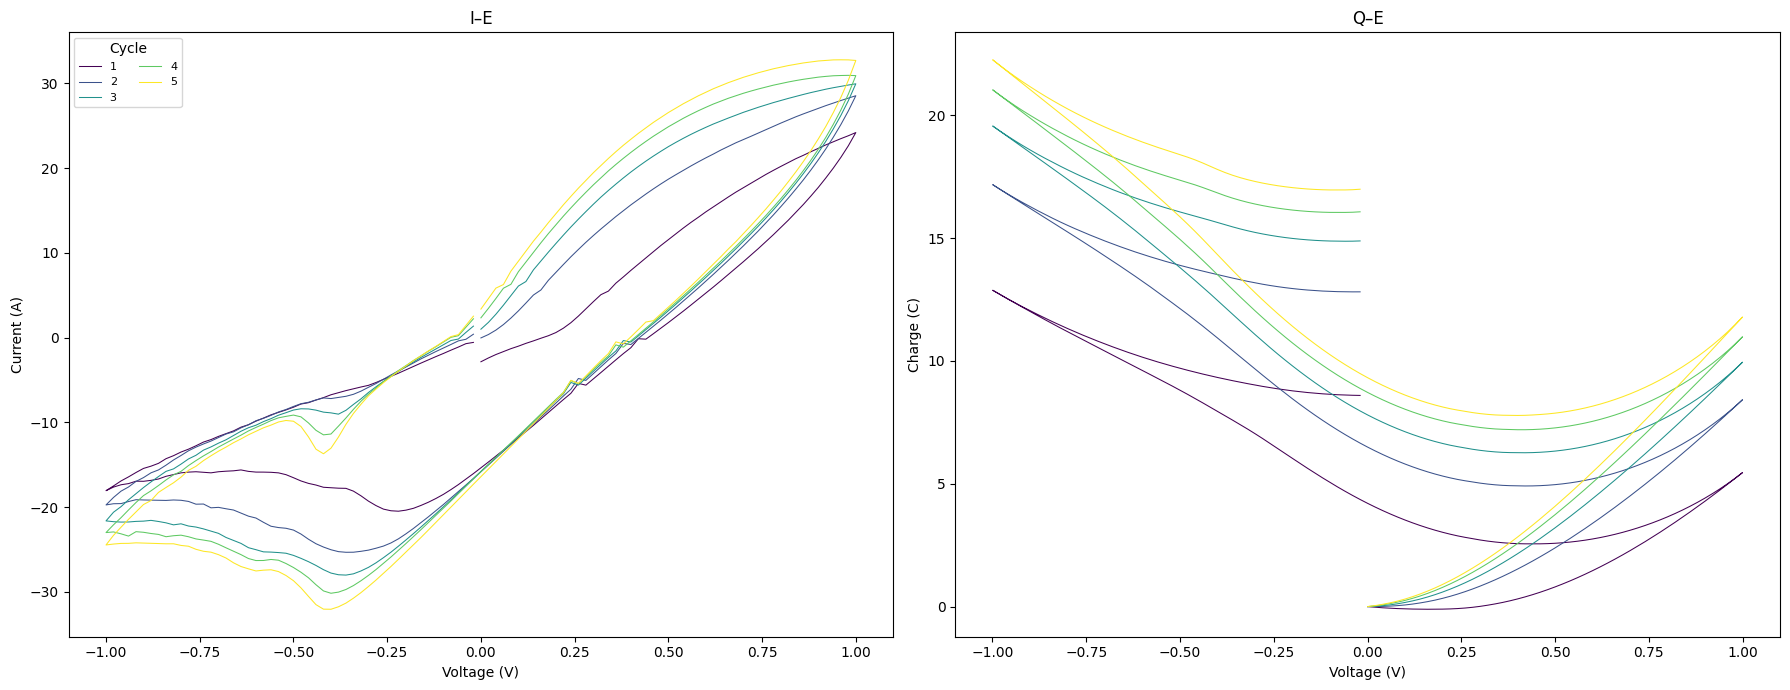

In [50]:
# --- 3) plots that only use the already-computed column ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

cmap = plt.cm.viridis
cycles = sorted(df["cycle"].unique())
for i, cyc in enumerate(cycles):
    sub = df[df["cycle"] == cyc]
    color = cmap(i / max(1, (len(cycles)-1)))
    ax1.plot(sub["voltage"], sub["current"], label=f"{cyc}", color=color, lw=.75)
    ax2.plot(sub["voltage"], sub["charge_C"], label=f"{cyc}", color=color, lw=.75)

ax1.set_xlabel("Voltage (V)"); ax1.set_ylabel("Current (A)"); ax1.set_title("I–E")
ax2.set_xlabel("Voltage (V)"); ax2.set_ylabel("Charge (C)");  ax2.set_title("Q–E")
ax1.legend(title="Cycle", fontsize=8, ncol=2)
plt.tight_layout(); plt.show()

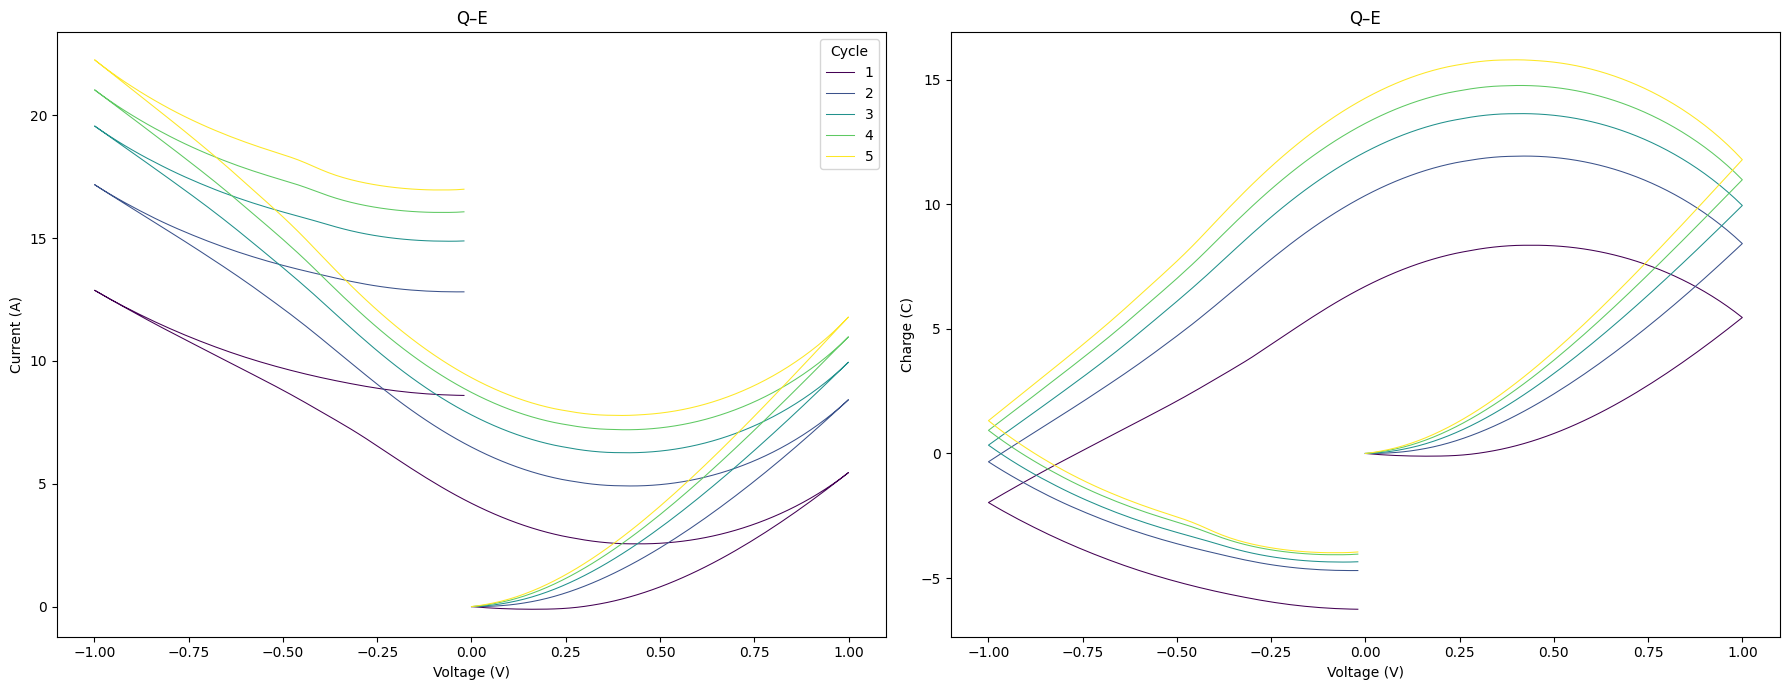

In [51]:
# --- 3) plots that only use the already-computed column ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), sharex=True)

cmap = plt.cm.viridis
cycles = sorted(df["cycle"].unique())
for i, cyc in enumerate(cycles):
    sub = df[df["cycle"] == cyc]
    color = cmap(i / max(1, (len(cycles)-1)))
    ax1.plot(sub["voltage"], sub["charge_C"], label=f"{cyc}", color=color, lw=.75)
    ax2.plot(sub["voltage"], sub["charge"], label=f"{cyc}", color=color, lw=.75)

ax1.set_xlabel("Voltage (V)"); ax1.set_ylabel("Current (A)"); ax1.set_title("Q–E")
ax2.set_xlabel("Voltage (V)"); ax2.set_ylabel("Charge (C)");  ax2.set_title("Q–E")
ax1.legend(title="Cycle")
plt.tight_layout(); plt.show()

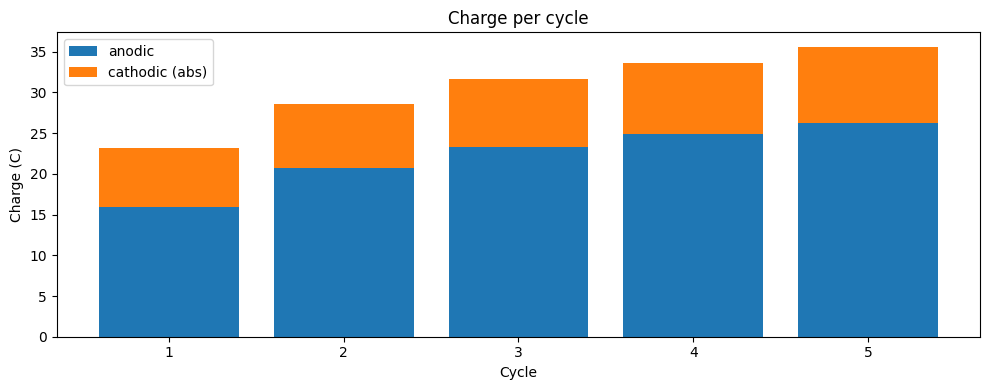

In [57]:
fig, ax = plt.subplots(figsize=(10,4))
x = Q_summary["cycle"]
ax.bar(x, Q_summary["Qa_C"], label="anodic")
ax.bar(x, -Q_summary["Qc_C"], bottom=Q_summary["Qa_C"], label="cathodic (abs)")

ax.set_xlabel("Cycle")
ax.set_ylabel("Charge (C)")
ax.set_title("Charge per cycle")
ax.legend()
plt.tight_layout()
plt.show()

In [53]:
df[df.columns[2:len(df.columns)-1]].head()

measurement_id  cycle  channel method_id  e_begin  e_end  e_step  e_vtx1  \
0   250827163801      1        1        cv      0.0    0.5    0.02     1.0   
1   250827163801      1        1        cv      0.0    0.5    0.02     1.0   
2   250827163801      1        1        cv      0.0    0.5    0.02     1.0   
3   250827163801      1        1        cv      0.0    0.5    0.02     1.0   
4   250827163801      1        1        cv      0.0    0.5    0.02     1.0   

   e_vtx2  scan_rate  n_scans          sweep_id  sweep_dir   voltage  \
0    -1.0        2.0        5  250827163801_ch1          1  0.000039   
1    -1.0        2.0        5  250827163801_ch1          1  0.020040   
2    -1.0        2.0        5  250827163801_ch1          1  0.040039   
3    -1.0        2.0        5  250827163801_ch1          1  0.060040   
4    -1.0        2.0        5  250827163801_ch1          1  0.079961   

    current    charge  charge_segment    q_norm  
0 -2.844334 -0.000000        0.000000  0.019470  
1 -2.396107 -0.026203       -0.026203  0.014760  
2 -1.990795 -0.048137       -0.048137  0.010817  
3 -1.637936 -0.066281       -0.066281  0.007556  
4 -1.299381 -0.080910       -0.080910  0.004927

In [54]:
df.columns[2:len(df.columns)-1]

Index(['measurement_id', 'cycle', 'channel', 'method_id', 'e_begin', 'e_end',
       'e_step', 'e_vtx1', 'e_vtx2', 'scan_rate', 'n_scans', 'sweep_id',
       'sweep_dir', 'voltage', 'current', 'charge', 'charge_segment',
       'q_norm'],
      dtype='object')

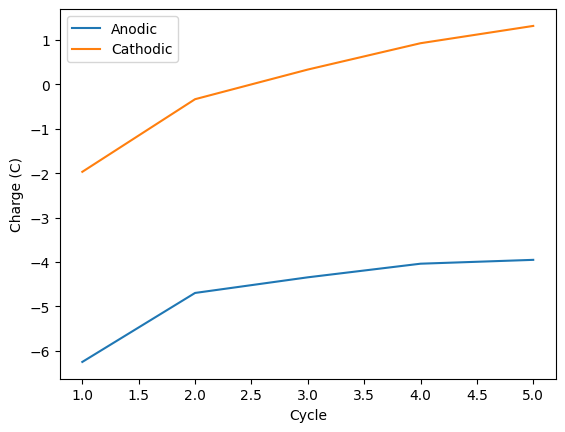

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# assume df is your dataframe

# group by cycle and sweep_dir
grouped = (
    df.groupby(['cycle', 'sweep_dir'])['charge']
      .last()   # or .sum() if charge is incremental
      .reset_index()
)

# pivot into anodic/cathodic columns
pivoted = grouped.pivot(index='cycle', columns='sweep_dir', values='charge')

# rename columns to something readable
# adjust mapping depending on how sweep_dir is coded in your data
pivoted = pivoted.rename(columns={1: 'anodic', -1: 'cathodic'})

# plot
plt.plot(pivoted.index, pivoted['anodic'], label='Anodic')
plt.plot(pivoted.index, pivoted['cathodic'], label='Cathodic')
plt.xlabel('Cycle')
plt.ylabel('Charge (C)')
plt.legend()
plt.show()